In [1]:
# Discontinued
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from conv2d import Conv2D
from neural_network import Layer, ReLU, dSigmoid, sigmoid

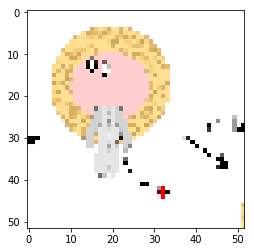

In [2]:
image = mpimg.imread('fig.png')
# make image smaller (faster execution) and change format from [0,1] to [0,255]
image = (image[::10,::10])
plt.imshow(image)
plt.show()

In [40]:
flags = image.copy()
flags = flags.sum(axis=2)
flags[flags!=3]=0
flags[flags==3]=1
flags = flags.reshape((*flags.shape,1))

In [41]:
# initialize system
n=16
cnn_input = Conv2D(n,image.shape[2],activation='ReLU')
cnn_hidden_1 = Conv2D(n,n,previous_layer=cnn_input,activation='ReLU')
cnn_hidden_2 = Conv2D(n,n,previous_layer=cnn_hidden_1,activation='ReLU')
cnn_output = Conv2D(1,n,previous_layer=cnn_hidden_2,activation='none')
cnn_output.initialize_weights()

In [47]:
pad = 4
for i in range(10):
    aa = cnn_input.feed_forward(image)    
    # manual derivative of the loss function
    y = flags[pad:-pad,pad:-pad]
    a = sigmoid(cnn_output.a)
    dy = -( (y/a) - ((1-y)/(1-a)) ) * dSigmoid(cnn_output.a)
    loss = (-y*np.log(a)-(1-y)*np.log(1-a)).sum()
    print(loss)
    cnn_output.back_propagate(dy)

1332.0726097216211
1330.602728243402
1327.9447151596269
1324.9662915571678
1321.0688439740395
1315.8036876987774
1308.5625754630669
1298.5437620211046
1284.9654256880222
1267.9061277313815


In [48]:
aa = cnn_input.feed_forward(image) 
bb = sigmoid(aa)

In [49]:
bb.min()

0.573272476714025

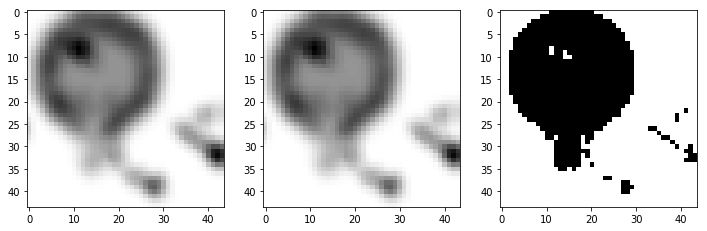

In [50]:
fig,axes = plt.subplots(ncols=3,figsize=(12,4))
axes[0].imshow(aa[:,:,0],cmap='gray')
axes[1].imshow(bb[:,:,0],cmap='gray')
axes[2].imshow(flags[pad:-pad,pad:-pad,0],cmap='gray')
plt.show()

In [ ]:
fig,axes = plt.subplots(ncols=2,figsize=(12,4))
axes[0].imshow(aa[:,:,0],cmap='gray')
axes[1].imshow(flags[2:-2,2:-2,0],cmap='gray')
plt.show()

In [ ]:
copy1 = conv.kernels.copy()
copyb1 = conv.bias.copy()
copy2 = conv2.kernels.copy()
copyb2 = conv2.bias.copy()
for i in range(5):
    # run one iteration
    temp = conv.feed_forward(image)
    #temp = conv2.feed_forward(temp)

    conv2.back_propagate(y=flags[2:-2,2:-2],learning_rate=0.00001)
    conv.back_propagate(learning_rate=0.00001)
    
    error = temp-flags[2:-2,2:-2]
    print((error**2).sum())

In [ ]:
# restore in case of gradient explosion
conv.kernels = copy1.copy()
conv.bias = copyb1.copy()
conv2.kernels = copy2.copy()
conv2.bias = copyb2.copy()

In [ ]:
fig,axes = plt.subplots(ncols=3,figsize=(12,4))
axes[0].imshow(temp[:,:,0],cmap='gray')
axes[1].imshow(flags[2:-2,2:-2,0],cmap='gray')
axes[2].imshow(error[:,:,0],cmap='gray')
plt.show()

In [ ]:
result = temp.copy()

In [ ]:
result.mean()

In [ ]:
result[result>=0.7] = 1
result[result<0.7] = 0

In [ ]:
fig,axes = plt.subplots(ncols=4,figsize=(12,4))
axes[0].imshow(temp[:,:,0],cmap='gray')
axes[1].imshow(result[:,:,0],cmap='gray')
axes[2].imshow(flags[2:-2,2:-2,0],cmap='gray')
axes[3].imshow(error[:,:,0],cmap='gray')
plt.show()